# Viscoelastic Oldroyd-B model -- axi-symmetric Couette flow

## Introduction to viscoelastic Oldroyd-B model
We deal with the viscoelastic Oldroyd-B model (Oldroyd, 1950). It is a model for material that exhibits both viscous and elastic behavior. For simplicity we can imagine it one dimension using the mechanical analogs: a linear spring and a linear dashpot, see the Figure below.<p>
<div align=center>
<img src="fig/spring-dashpot.png" width="550"/>
</div>

The linear spring represents an elastic material whose relation between the one-dimensional stress $\sigma$ and one-dimensional strain $\varepsilon$ reads
\begin{equation}
\sigma=G \varepsilon,
\end{equation}
where $G$ is the elastic modulus of the spring. The linear dashpot represents the Newtonian fluid with the relation
\begin{equation}
\sigma=\mu\dot{\varepsilon},
\end{equation}
where $\mu$ is the fluid viscosity.

Thus, if we assume that all points of the material consist just from the dashpots, we have a Newtonian fluid; if we assume that all points conisist only from the springs we obtain an elastic solid. In case of viscoelastic fluids we create a mixture of springs and dashpots. The Oldroyd mechanical analog consists of one spring and one dashpot connected to series (called Maxwell analog), and an additional dashpot that is attached in paralel, see the Figure below.<p>
<div align=center>
<img src="fig/Oldroyd-analog.png" width="400"/>
</div>
To get the relation between total stres $\sigma$ and total strain $\varepsilon$, we realize that
\begin{align*}
\sigma&=\sigma_{\rm D_2} + \sigma_{\rm M},\qquad&{\rm and}&&\qquad \varepsilon&=\varepsilon_{\rm D_2}=\varepsilon_{\rm M},\\
\sigma_{\rm M}&=\sigma_{\rm D_1}=\sigma_{\rm S},\qquad&{\rm and}&&\qquad\varepsilon_{\rm M}&=\varepsilon_{\rm D_1}+\varepsilon_{\rm S}.
\end{align*}
By straightforward manipulation we get the relation for the Maxwell analog, i.e.
\begin{align*}
\dot{\varepsilon}_{\rm M}&=\dot{\varepsilon}_{\rm D_1}+\dot{\varepsilon}_{\rm S}\\
&=\frac{\sigma_{\rm D_1}}{\mu}+\frac{\dot{\sigma}_{\rm S}}{G}\\
&=\frac{\sigma_{\rm M}}{\mu_1}+\frac{\dot{\sigma}_{\rm M}}{G},
\end{align*}
or we can write it a slightly different way
\begin{equation}
\dot{\sigma}_{\rm M}+\frac{G}{\mu_1}\sigma_{\rm M}=G\dot{\varepsilon}_{\rm M}.
\end{equation}
Then, the stress-strain relation for the Oldroyd one-dimensional analog simply reads
\begin{align*}
\sigma=\mu_2\dot{\varepsilon}+\sigma_{\rm M},\\
\dot{\sigma}_{\rm M}+\frac{G}{\mu_1}\sigma_{\rm M}&=G\dot{\varepsilon}_{\rm M}.
\end{align*}
However, we obtained only the relation between the stress and strain in one dimension. The journey to a fully three-dimensional model is long and it is beyond the scope of this FEniCS tutorial. In short, in the fully three-dimensional Oldroyd-B model, the one-diemnsional stress $\sigma$ is replaced by the Cauchy stress $\mathbb{T}$, $\dot{\varepsilon}$ by the symmetric part of the velocity gradient $\mathbb{D}$ and the simple derivative by the objective upper convected Oldroyd derivative that transforms correctly under the change of observer. The Cauchy stress tensor $\mathbb{T}$ for the Oldroyd-B model reads
\begin{align*}
\mathbb{T}&=-p\mathbb{I}+2\mu_2\mathbb{D}+\mathbb{A},\\
\frac{\partial \mathbb{A}}{\partial t}+{\bf v}\cdot\nabla\mathbb{A}-(\nabla{\bf v})\mathbb{A}-\mathbb{A}(\nabla{\bf v})^{\rm T}+\frac{G}{\mu_1}\mathbb{A}&=2G\mathbb{D}.
\end{align*}

Finally, the full set of governing equations for the Oldroyd-B model read
\begin{align*}
{\rm div}\,{\bf v}&=0,\\
\rho\left(\frac{\partial{\bf v}}{\partial t}+({\bf v}\cdot\nabla){\bf v}\right)&={\rm div}\,\mathbb{T},\quad
\mathbb{T}=-p\mathbb{I}+2\mu_2\mathbb{D}+\mathbb{A},\\
\frac{\partial \mathbb{A}}{\partial t}+{\bf v}\cdot\nabla\mathbb{A}-(\nabla{\bf v})\mathbb{A}-\mathbb{A}(\nabla{\bf v})^{\rm T}+\frac{G}{\mu_1}\mathbb{A}&=2G\mathbb{D}.
\end{align*}

Very often the model is rewritten in the form where $\mathbb{A}=G(\mathbb{B}-\mathbb{I})$. The model then transforms to
\begin{align*}
{\rm div}\,{\bf v}&=0,\\
\rho\left(\frac{\partial{\bf v}}{\partial t}+({\bf v}\cdot\nabla){\bf v}\right)&={\rm div}\,\mathbb{T},\quad
\mathbb{T}=-p\mathbb{I}+2\mu_2\mathbb{D}+G(\mathbb{B}-\mathbb{I}),\\
\frac{\partial \mathbb{B}}{\partial t}+{\bf v}\cdot\nabla\mathbb{B}-(\nabla{\bf v})\mathbb{B}-\mathbb{B}(\nabla{\bf v})^{\rm T}+\frac{G}{\mu_1}(\mathbb{B}-\mathbb{I})&=\mathbb{O}.
\end{align*}

## Problem description

We test our finite element implementation on a problem for which we have a non-trivial analytical solution -- the problem of axi-symmetric steady Couette flow. The domain $\Omega$ is bordered with two concentric circles, radius of the inner one is 1 m, radius of
the outer one is 2 m, the material flows inside these two circles and fully sticks to both boundaries. The inner circle is fixed and does not move, the outer one rotates with constant angular velocity $\omega = 0.5$ rad s$^{-1}$, thus the fluid rotates with it. The problem is depicted in the Figure below.<p>
<div align=center>
<img src="fig/problem-Couette.png" width="300"/>
</div>

To obtain the analytical solution, we employ the polar coordinates, we assume that all unknowns $p, {\bf v}, \mathbb{B}$ depend only on the radial coordinate $r$ and the fluid flows only in the direction of rotation, i.e.
\begin{equation}
{\bf v}=(0, v_{\varphi}(r)).
\end{equation}
If we fix the pressure $p=0$ at the inner circle, the analytical solution reads
\begin{align*}
v_{\varphi}&=\frac23\left(r-\frac{1}{r}\right),\\
p&=\frac{4\rho}{9}\left(\frac{r^2}{2}-2\ln r - \frac{1}{2r^2}\right)+\frac{8}{9}\left(\frac{\mu_1^2}{G r^4}-1\right),\\
B_{rr}&=1,\quad B_{r\varphi}=\frac{4\mu_1}{3G r^2},\quad B_{\varphi\varphi}=1+\frac{32\mu_1^2}{9G^2 r^4}.
\end{align*}

## Weak formulation

Since we are interested in the steady solution, we omit the time derivatives, test the corresponding equations by the test arbitrary functions $(q, {\bf q}, \mathbb{Q})$, integrate over $\Omega$ and use the divergence theorem
\begin{align*}
&\int_\Omega \mathrm{div}\,\mathbf{v} \,  q\; \mathrm{d}\mathbf{x} = 0,\\
&\int_\Omega (\rho\mathbf{v}\cdot\nabla\mathbf{v})\cdot\mathbf{q}\; \mathrm{d}\mathbf{x} + \int_\Omega \mathbb{T}\cdot\nabla\mathbf{q}\; \mathrm{d}\mathbf{x} = 0,\\
&\int_\Omega \left({\bf v}\cdot\nabla\mathbb{B}-(\nabla{\bf v})\mathbb{B}-\mathbb{B}(\nabla{\bf v})^{\rm T}+\frac{G}{\mu_1}(\mathbb{B}-\mathbb{I})\right)\cdot\mathbb{Q}=0,
\end{align*}
where
\begin{equation}
\mathbb{T}=-p\mathbb{I}+2\mu_2\mathbb{D}+G(\mathbb{B}-\mathbb{I}).
\end{equation}
Here, we imposed that $\mathbf{v}$ vanishes on the Dirichlet boundaries $\Gamma_\mathrm{in}$, $\Gamma_\mathrm{out}$.

This non-linear problem is now solved using the FEniCS and compared to the analytical solution.

## FEniCS implementation

Import **dolfin** (FEniCS backend), **matplotlib.pyplot** (for plots), **numpy** (for arrays), **mshr** (for meshing) and **time** (for time benchmarking).

In [1]:
import dolfin as df
import matplotlib.pyplot as plt
import numpy as np
import mshr
from time import time

Create mesh.

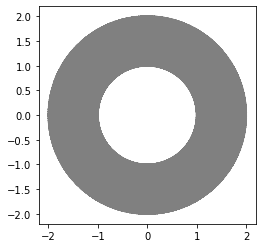

In [2]:
R1 = 1.0    # Radius R1
R2 = 2.0    # Radius R2
geometry = mshr.Circle(df.Point(0.0, 0.0), R2, 180) - mshr.Circle(df.Point(0.0, 0.0), R1, 180)

mesh = mshr.generate_mesh(geometry, 100)
mesh.init() 
df.plot(mesh)
plt.show()

Identify boundaries.

In [3]:
# define boundary as a class
class Inner(df.SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and x[0]*x[0]+x[1]*x[1]<R1*R1+1.0e-3

inner = Inner()

class Outer(df.SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and x[0]*x[0]+x[1]*x[1]>R2*R2-1.0e-3

outer = Outer()

# mark boundary parts
bndry = df.MeshFunction('size_t', mesh, mesh.topology().dim()-1, 0)
inner.mark(bndry, 1)
outer.mark(bndry, 2)

Define mixed function space for pressure $p$, velocity $\mathbf{v}$ and extra stress tensor $\mathbb{B}$. In this example, we use inf-sup stable Taylor-Hood elements for velocity and pressure, which are quadratic in velocity and linear in pressure; and linear in extra stress tensor.

In [4]:
Ev = df.VectorElement("CG", mesh.ufl_cell(), 2) # 2 = quadratic elements
Ep = df.FiniteElement("CG", mesh.ufl_cell(), 1) # 1 = linear elements
E = df.MixedElement([Ev, Ep, Ep, Ep, Ep])
W = df.FunctionSpace(mesh, E)
print("Problem size: {0:d}".format(W.dim())) 

Calling FFC just-in-time (JIT) compiler, this may take some time.
Problem size: 178382


Declare boundary conditions.

In [5]:
outervel = df.Expression(("-Omega*x[1]", "Omega*x[0]"), Omega=0.5, degree=1)
innervel = df.Expression(("-Omega*x[1]", "Omega*x[0]"), Omega=0.0, degree=1)

bc_inner = df.DirichletBC(W.sub(0), innervel, bndry, 1) #inner radius
bc_outer = df.DirichletBC(W.sub(0), outervel, bndry, 2) #outer radius
bcp = df.DirichletBC(W.sub(4), df.Constant(0.0), "near(x[0],1.0) && near(x[1],0.0)", method="pointwise") #Fix the pressure at one point

bcs = [bc_outer, bc_inner, bcp] 

Write the weak form.

In [6]:
rho = df.Constant(1.0)
mu1 = df.Constant(1.0)
mu2 = df.Constant(1.0)
G = df.Constant(1.0)

v_, b11_, b12_, b22_, p_ = df.TestFunctions(W)
w = df.Function(W)
v, b11, b12, b22, p = df.split(w)

B_ = df.as_tensor([[b11_,b12_],[b12_,b22_]])
B = df.as_tensor([[b11,b12],[b12,b22]])

I = df.Identity(mesh.geometry().dim())
L = df.grad(v)
D = 0.5*(L + L.T)
matderv = df.grad(v)*v
T = -p*I + 2.0*mu2*D + G*(B-I)
oldroydderB = B.dx(0)*v[0] + B.dx(1)*v[1] - L*B - B*(L.T)

Eq1 = df.div(v)*p_*df.dx
Eq2 = df.inner(rho*matderv, v_)*df.dx + df.inner(T, df.grad(v_))*df.dx
Eq3 = df.inner(oldroydderB, B_)*df.dx + mu1/G*df.inner(B - I, B_)*df.dx

Eq = Eq1 + Eq2 + Eq3 

Solve the non-linear problem using Newton solver.

In [7]:
problem=df.NonlinearVariationalProblem(Eq,w,bcs,df.derivative(Eq,w))
solver=df.NonlinearVariationalSolver(problem)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


Solve the linear problem using *mumps* direct sparse linear solver.

In [8]:
solver.parameters['newton_solver']['linear_solver'] = 'mumps'
solver.parameters['newton_solver']['absolute_tolerance'] = 5e-9
solver.parameters['newton_solver']['relative_tolerance'] = 5e-9

ic = df.Expression(("0.0","0.0","1.0","0.0","1.0","0.0"), degree = 1)
w.assign(df.interpolate(ic, W))

tick0 = time()
solver.solve()
tick1 = time()
print("Elapsed time = ", tick1 - tick0, "s.")

Solving nonlinear variational problem.
Elapsed time =  30.424657583236694 s.
  Newton iteration 0: r (abs) = 8.570e+01 (tol = 5.000e-09) r (rel) = 1.000e+00 (tol = 5.000e-09)
  Newton iteration 1: r (abs) = 1.043e-01 (tol = 5.000e-09) r (rel) = 1.217e-03 (tol = 5.000e-09)
  Newton iteration 2: r (abs) = 3.589e-05 (tol = 5.000e-09) r (rel) = 4.188e-07 (tol = 5.000e-09)
  Newton iteration 3: r (abs) = 6.460e-09 (tol = 5.000e-09) r (rel) = 7.538e-11 (tol = 5.000e-09)
  Newton solver finished in 3 iterations and 3 linear solver iterations.


Show results with pyplot.

Plot of v[0] 

Object cannot be plotted directly, projecting to piecewise linears.


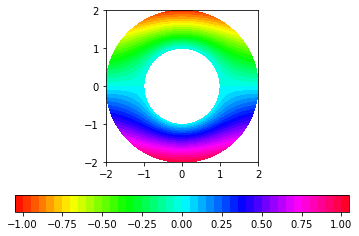

Plot of v[1] 

Object cannot be plotted directly, projecting to piecewise linears.


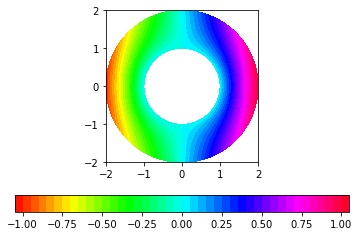

Plot of p 



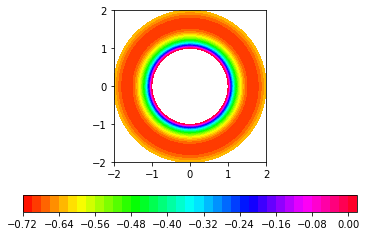

Plot of Bxx 



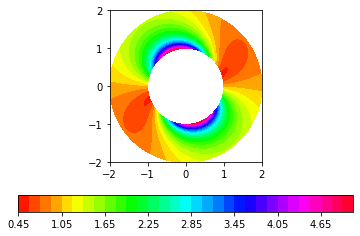

Plot of Bxy 



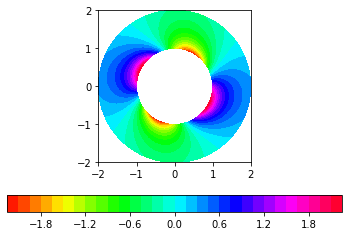

Plot of Byy 



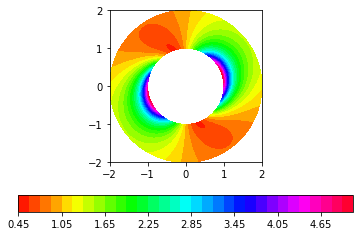

In [13]:
(v, b11, b12, b22, p) = w.split() 
v.rename("v", "velocity")
p.rename("p", "pressure")
b11.rename("Bxx", "stress Bxx")
b12.rename("Bxy", "stress Bxy")
b22.rename("Byy", "stress Byy")

for unknown in v[0], v[1], p, b11, b12, b22:
    print("Plot of", unknown, "\n")
    figure = df.plot(unknown, cmap=plt.cm.hsv)
    plt.colorbar(figure, location='bottom')
    plt.show()

Compare the numerical solution to the analytical solution.

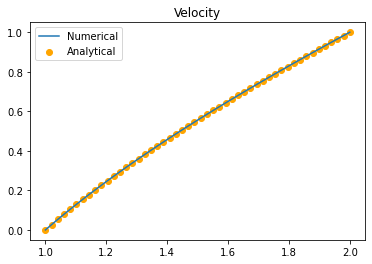

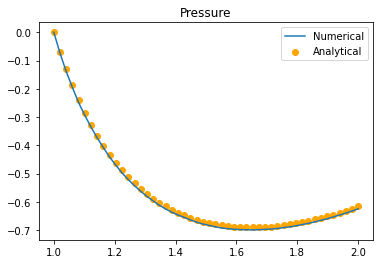

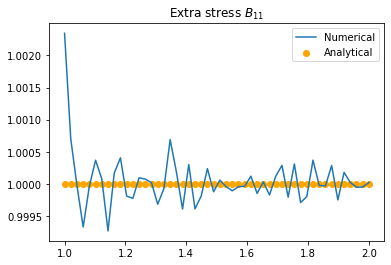

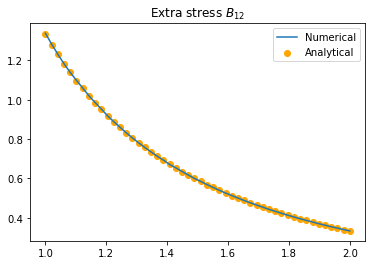

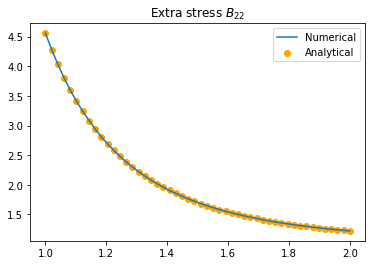

In [10]:
X = np.linspace(R1, R2)

V_num = [v(x, 0)[1] for x in X]
V_anal = [(2.0/3.0)*(x - 1.0/x) for x in X]
plt.plot(X, V_num, label='Numerical')
plt.scatter(X, V_anal, label='Analytical', color='orange')
plt.legend()
plt.title('Velocity')
plt.show()

p_num = [p(x, 0) for x in X]
p_anal = [(4.0/9.0)*((x**2)/2.0 - 2.0*np.log(x) - 1.0/(2.0*(x**2))) + (8.0/9.0)*(1.0/(x**4) - 1.0) for x in X]
plt.plot(X, p_num, label='Numerical')
plt.scatter(X, p_anal, label='Analytical', color='orange')
plt.legend()
plt.title('Pressure')
plt.show()

b11_num = [b11(x, 0) for x in X]
b11_anal = [1.0 for x in X]
plt.plot(X, b11_num, label='Numerical')
plt.scatter(X, b11_anal, label='Analytical', color='orange')
plt.legend()
plt.title('Extra stress $B_{11}$')
plt.show()

b12_num = [b12(x, 0) for x in X]
b12_anal = [4.0/(3.0*(x**2)) for x in X]
plt.plot(X, b12_num, label='Numerical')
plt.scatter(X, b12_anal, label='Analytical', color='orange')
plt.legend()
plt.title('Extra stress $B_{12}$')
plt.show()

b22_num = [b22(x, 0) for x in X]
b22_anal = [1.0 + 32.0/(9.0*(x**4)) for x in X]
plt.plot(X, b22_num, label='Numerical')
plt.scatter(X, b22_anal, label='Analytical', color='orange')
plt.legend()
plt.title('Extra stress $B_{22}$')
plt.show()

## Exercises 
1) Modify the problem using the Navier-Stokes equations? How does the velocity field change?
2) Experiment with different material parameters, make the spring stiffer, check the ratio $G/\mu_1$.
3) Experiment with different angular velocities.
4) Try different mixed elements, c.f. to lecture on Poiseuille flow with the Stokes.
5) Derive the analytical solution in polar coordinates.

## Complete code

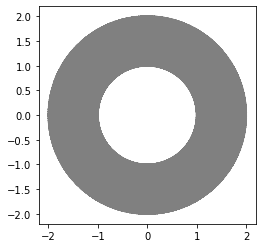

Problem size: 178382
Solving nonlinear variational problem.
Elapsed time =    Newton iteration 0: r (abs) = 8.570e+01 (tol = 5.000e-09) r (rel) = 1.000e+00 (tol = 5.000e-09)
  Newton iteration 1: r (abs) = 1.043e-01 (tol = 5.000e-09) r (rel) = 1.217e-03 (tol = 5.000e-09)
  Newton iteration 2: r (abs) = 3.589e-05 (tol = 5.000e-09) r (rel) = 4.188e-07 (tol = 5.000e-09)
  Newton iteration 3: r (abs) = 6.460e-09 (tol = 5.000e-09) r (rel) = 7.538e-11 (tol = 5.000e-09)
  Newton solver finished in 3 iterations and 3 linear solver iterations.
29.5653817653656 s.
Plot of v[0] 

Object cannot be plotted directly, projecting to piecewise linears.


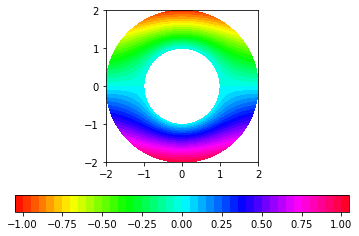

Plot of v[1] 

Object cannot be plotted directly, projecting to piecewise linears.


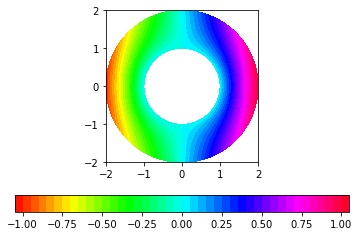

Plot of p 



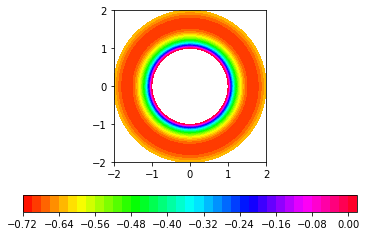

Plot of Bxx 



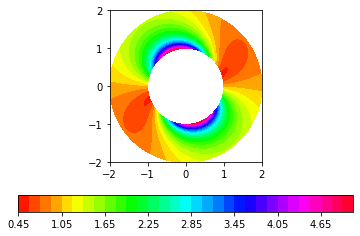

Plot of Bxy 



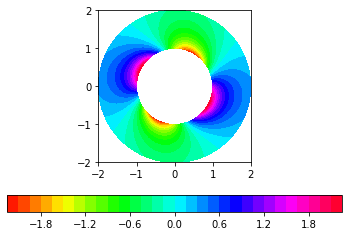

Plot of Byy 



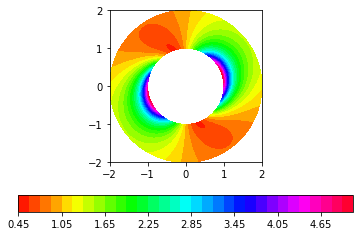

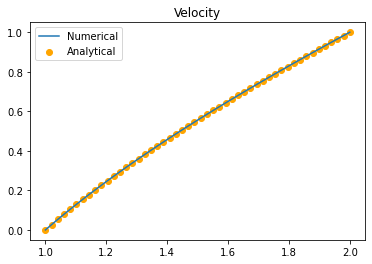

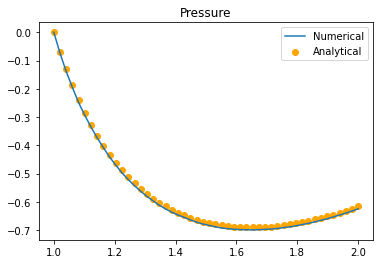

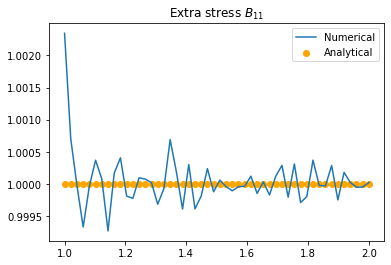

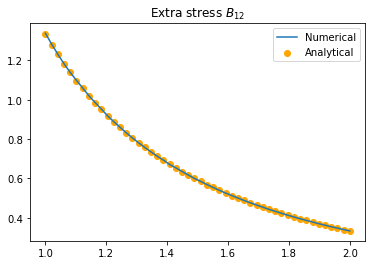

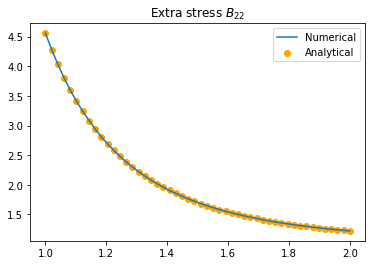

In [14]:
import dolfin as df
import matplotlib.pyplot as plt
import numpy as np
import mshr
from time import time

R1 = 1.0    # Radius R1
R2 = 2.0    # Radius R2
geometry = mshr.Circle(df.Point(0.0, 0.0), R2, 180) - mshr.Circle(df.Point(0.0, 0.0), R1, 180)

mesh = mshr.generate_mesh(geometry, 100)
mesh.init() 
df.plot(mesh)
plt.show()

# define boundary as a class
class Inner(df.SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and x[0]*x[0]+x[1]*x[1]<R1*R1+1.0e-3

inner = Inner()

class Outer(df.SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and x[0]*x[0]+x[1]*x[1]>R2*R2-1.0e-3

outer = Outer()

# mark boundary parts
bndry = df.MeshFunction('size_t', mesh, mesh.topology().dim()-1, 0)
inner.mark(bndry, 1)
outer.mark(bndry, 2)

Ev = df.VectorElement("CG", mesh.ufl_cell(), 2) # 2 = quadratic elements
Ep = df.FiniteElement("CG", mesh.ufl_cell(), 1) # 1 = linear elements
E = df.MixedElement([Ev, Ep, Ep, Ep, Ep])
W = df.FunctionSpace(mesh, E)
print("Problem size: {0:d}".format(W.dim())) 

outervel = df.Expression(("-Omega*x[1]", "Omega*x[0]"), Omega=0.5, degree=1)
innervel = df.Expression(("-Omega*x[1]", "Omega*x[0]"), Omega=0.0, degree=1)

bc_inner = df.DirichletBC(W.sub(0), innervel, bndry, 1) #inner radius
bc_outer = df.DirichletBC(W.sub(0), outervel, bndry, 2) #outer radius
bcp = df.DirichletBC(W.sub(4), df.Constant(0.0), "near(x[0],1.0) && near(x[1],0.0)", method="pointwise") #Fix the pressure at one point

bcs = [bc_outer, bc_inner, bcp] 

rho = df.Constant(1.0)
mu1 = df.Constant(1.0)
mu2 = df.Constant(1.0)
G = df.Constant(1.0)

v_, b11_, b12_, b22_, p_ = df.TestFunctions(W)
w = df.Function(W)
v, b11, b12, b22, p = df.split(w)

B_ = df.as_tensor([[b11_,b12_],[b12_,b22_]])
B = df.as_tensor([[b11,b12],[b12,b22]])

I = df.Identity(mesh.geometry().dim())
L = df.grad(v)
D = 0.5*(L + L.T)
matderv = df.grad(v)*v
T = -p*I + 2.0*mu2*D + G*(B-I)
oldroydderB = B.dx(0)*v[0] + B.dx(1)*v[1] - L*B - B*(L.T)

Eq1 = df.div(v)*p_*df.dx
Eq2 = df.inner(rho*matderv, v_)*df.dx + df.inner(T, df.grad(v_))*df.dx
Eq3 = df.inner(oldroydderB, B_)*df.dx + mu1/G*df.inner(B - I, B_)*df.dx

Eq = Eq1 + Eq2 + Eq3 

problem=df.NonlinearVariationalProblem(Eq,w,bcs,df.derivative(Eq,w))
solver=df.NonlinearVariationalSolver(problem)

solver.parameters['newton_solver']['linear_solver'] = 'mumps'
solver.parameters['newton_solver']['absolute_tolerance'] = 5e-9
solver.parameters['newton_solver']['relative_tolerance'] = 5e-9

ic = df.Expression(("0.0","0.0","1.0","0.0","1.0","0.0"), degree = 1)
w.assign(df.interpolate(ic, W))

tick0 = time()
solver.solve()
tick1 = time()
print("Elapsed time = ", tick1 - tick0, "s.")

(v, b11, b12, b22, p) = w.split() 
v.rename("v", "velocity")
p.rename("p", "pressure")
b11.rename("Bxx", "stress Bxx")
b12.rename("Bxy", "stress Bxy")
b22.rename("Byy", "stress Byy")

for unknown in v[0], v[1], p, b11, b12, b22:
    print("Plot of", unknown, "\n")
    figure = df.plot(unknown, cmap=plt.cm.hsv)
    plt.colorbar(figure, location='bottom')
    plt.show()
	
X = np.linspace(R1, R2)

V_num = [v(x, 0)[1] for x in X]
V_anal = [(2.0/3.0)*(x - 1.0/x) for x in X]
plt.plot(X, V_num, label='Numerical')
plt.scatter(X, V_anal, label='Analytical', color='orange')
plt.legend()
plt.title('Velocity')
plt.show()

p_num = [p(x, 0) for x in X]
p_anal = [(4.0/9.0)*((x**2)/2.0 - 2.0*np.log(x) - 1.0/(2.0*(x**2))) + (8.0/9.0)*(1.0/(x**4) - 1.0) for x in X]
plt.plot(X, p_num, label='Numerical')
plt.scatter(X, p_anal, label='Analytical', color='orange')
plt.legend()
plt.title('Pressure')
plt.show()

b11_num = [b11(x, 0) for x in X]
b11_anal = [1.0 for x in X]
plt.plot(X, b11_num, label='Numerical')
plt.scatter(X, b11_anal, label='Analytical', color='orange')
plt.legend()
plt.title('Extra stress $B_{11}$')
plt.show()

b12_num = [b12(x, 0) for x in X]
b12_anal = [4.0/(3.0*(x**2)) for x in X]
plt.plot(X, b12_num, label='Numerical')
plt.scatter(X, b12_anal, label='Analytical', color='orange')
plt.legend()
plt.title('Extra stress $B_{12}$')
plt.show()

b22_num = [b22(x, 0) for x in X]
b22_anal = [1.0 + 32.0/(9.0*(x**4)) for x in X]
plt.plot(X, b22_num, label='Numerical')
plt.scatter(X, b22_anal, label='Analytical', color='orange')
plt.legend()
plt.title('Extra stress $B_{22}$')
plt.show()